In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = "CoolTerm Capture (Untitled_0.stc) 2024-05-03 14-00-24-140.txt"

with open(data_path, 'r') as file:
    lines = file.readlines()

processed_data = []
temp_data = {}

# Veri işleme
for line in lines:
    line = line.strip()
    if 'Latitude:' in line:
        temp_data['Latitude'] = float(line.split(':')[1].strip())
    elif 'Longitude:' in line:
        temp_data['Longitude'] = float(line.split(':')[1].strip())
    elif 'Speed (km/s):' in line:
        temp_data['Speed'] = float(line.split(':')[1].strip())
    elif 'AccelX:' in line:
        parts = line.split(',')
        temp_data['AccelX'] = float(parts[0].split(':')[1].strip())
        temp_data['AccelY'] = float(parts[1].split(':')[1].strip())
        temp_data['AccelZ'] = float(parts[2].split(':')[1].strip())
        temp_data['GyroX'] = float(parts[3].split(':')[1].strip())
        temp_data['GyroY'] = float(parts[4].split(':')[1].strip())
        temp_data['GyroZ'] = float(parts[5].split(':')[1].strip())
        # Her bir GPS okumasından sonra mevcut veriyi listeye ekle
        if 'Latitude' in temp_data and 'Longitude' in temp_data and 'Speed' in temp_data:
            processed_data.append(temp_data.copy())  # Yeni bir veri grubu için temp_data'yı kopyala

# DataFrame oluştur
df = pd.DataFrame(processed_data)

# Verilerin ilk birkaç satırını yazdır
print(df.head())

# DataFrame'i CSV olarak kaydet
df.to_csv('processed_data_complete.csv', index=False)

    Latitude  Longitude  Speed  AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
0  40.232429  29.009088   9.69    0.77   -0.59    9.46   0.10  -0.07   0.37
1  40.232429  29.009088   9.69    0.51   -0.20    8.14  -0.08  -0.04   0.37
2  40.232429  29.009088   9.69    1.00   -0.34   10.54  -0.08   0.02   0.37
3  40.232395  29.009082  14.13    0.48   -0.58   10.24  -0.00   0.01   0.33
4  40.232395  29.009082  14.13    0.09   -1.22   10.05  -0.04   0.00   0.23


In [12]:
len(df["Latitude"])

4453

In [13]:
def count_keyword_in_file(file_path, keyword):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        # Tüm metni küçük harfe dönüştürerek ve kelime kelime ayırarak anahtar kelimenin sayısını bul
        count = content.lower().count(keyword.lower())
        return count
    except FileNotFoundError:
        print("Dosya bulunamadı.")
        return 0
    except Exception as e:
        print(f"Bir hata oluştu: {e}")
        return 0

# Dosya yolu ve aranacak kelime
file_path = 'CoolTerm Capture (Untitled_0.stc) 2024-05-03 14-00-24-140.txt'
keyword = 'Latitude:'

# Fonksiyonu çağır
count = count_keyword_in_file(file_path, keyword)
print(f"'{keyword}' kelimesi dosyada {count} kez geçiyor.")


'Latitude:' kelimesi dosyada 3905 kez geçiyor.


In [14]:
unique_latitudes = df['Latitude'].nunique()
print(f"'Latitude' sütununda {unique_latitudes} benzersiz enlem değeri var.")


'Latitude' sütununda 687 benzersiz enlem değeri var.


In [15]:
import pandas as pd

# Öncelikle, hız verisini numerik bir değere çevirelim
df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')

# Hız değişimlerini hesaplayalım
df['Speed_Diff'] = df['Speed'].diff().fillna(0)

# İlk birkaç satırı gösterelim
print(df[['Speed', 'Speed_Diff']].head())

   Speed  Speed_Diff
0   9.69        0.00
1   9.69        0.00
2   9.69        0.00
3  14.13        4.44
4  14.13        0.00


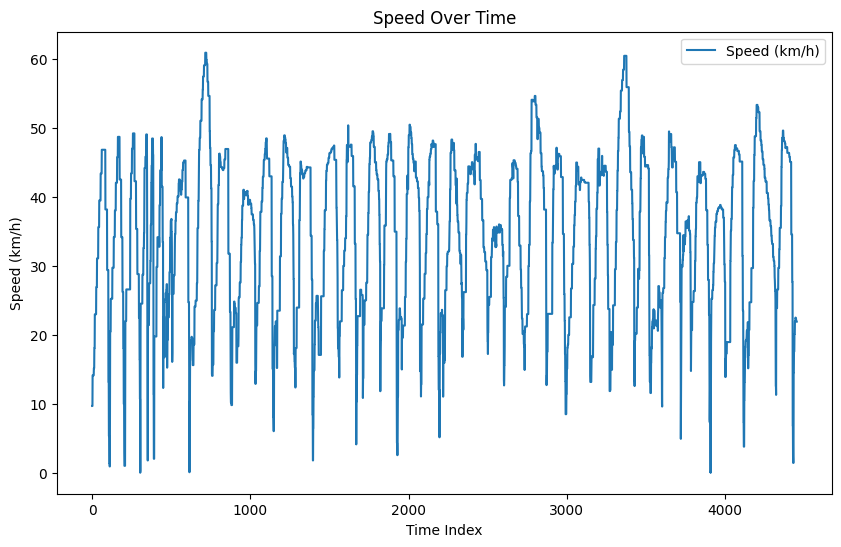

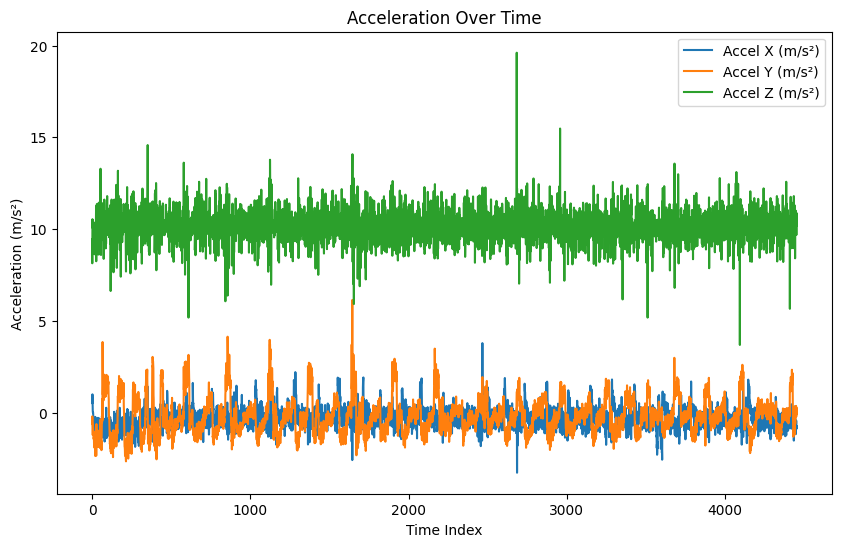

In [16]:
# Hız grafiği
plt.figure(figsize=(10, 6))
plt.plot(df['Speed'], label='Speed (km/h)')
plt.title('Speed Over Time')
plt.xlabel('Time Index')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.show()

# İvme grafiği
plt.figure(figsize=(10, 6))
plt.plot(df['AccelX'], label='Accel X (m/s²)')
plt.plot(df['AccelY'], label='Accel Y (m/s²)')
plt.plot(df['AccelZ'], label='Accel Z (m/s²)')
plt.title('Acceleration Over Time')
plt.xlabel('Time Index')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.show()

In [19]:
import pandas as pd
import numpy as np

# Dosya yükleme
df = pd.read_csv('processed_data_complete.csv')

# Başlangıç tarihi ve saati dosya adından alınır
start_datetime = pd.to_datetime('2024-05-03 14:00:24.140')

# Zaman damgası sütunu oluşturma
df['Timestamp'] = [start_datetime + pd.to_timedelta(1 * i, unit='s') for i in range(len(df))]

# DataFrame'i kontrol et
print(df.head())

# Güncellenmiş DataFrame'i CSV olarak kaydet
df.to_csv('processed_data_with_timestamps.csv', index=False)


    Latitude  Longitude  Speed  AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ  \
0  40.232429  29.009088   9.69    0.77   -0.59    9.46   0.10  -0.07   0.37   
1  40.232429  29.009088   9.69    0.51   -0.20    8.14  -0.08  -0.04   0.37   
2  40.232429  29.009088   9.69    1.00   -0.34   10.54  -0.08   0.02   0.37   
3  40.232395  29.009082  14.13    0.48   -0.58   10.24  -0.00   0.01   0.33   
4  40.232395  29.009082  14.13    0.09   -1.22   10.05  -0.04   0.00   0.23   

                Timestamp  
0 2024-05-03 14:00:24.140  
1 2024-05-03 14:00:25.140  
2 2024-05-03 14:00:26.140  
3 2024-05-03 14:00:27.140  
4 2024-05-03 14:00:28.140  


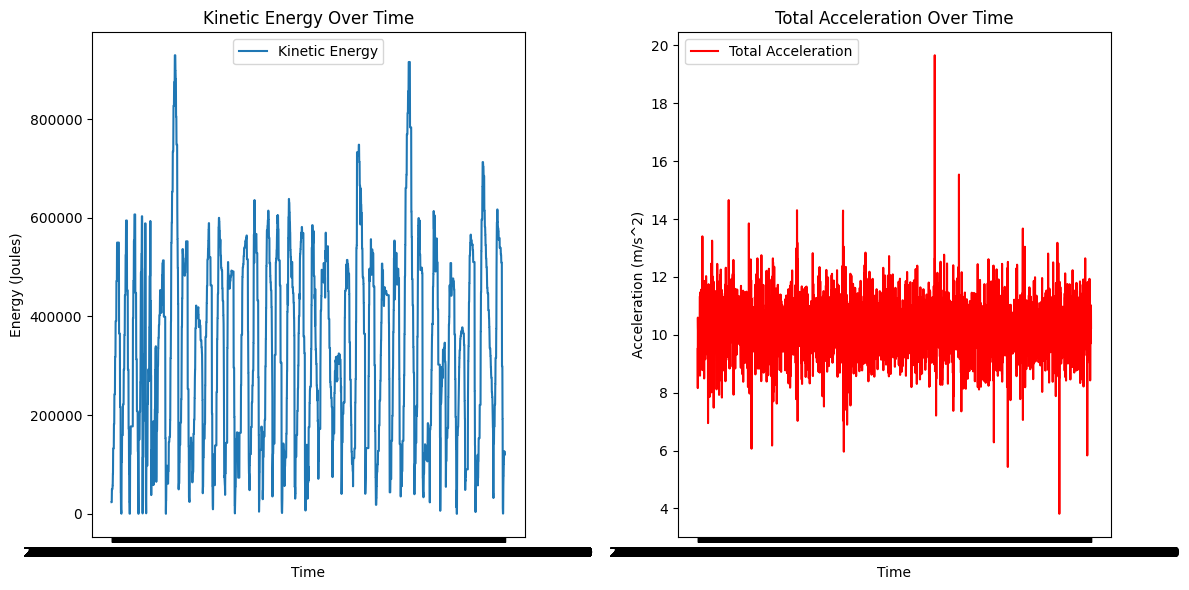

In [23]:
import pandas as pd
import numpy as np

# Verileri yükle
df = pd.read_csv('processed_data_with_timestamps.csv')

# Basit bir sensör füzyon örneği: Hız ve ivmelenme verilerini kullanarak kinetik enerji hesaplayalım
# Kinetik enerji = 1/2 * m * v^2 (m: kütle, v: hız (m/s cinsinden))
# Örnek kütle değeri (araba yaklaşık olarak): 6500 kg varsayalım
m = 6500  # kg

# Hızı m/s cinsine dönüştür (km/s'den m/s'ye çevirme)
df['Speed_m/s'] = df['Speed'] * 1000 / 3600

# Kinetik Enerji hesaplama
df['Kinetic_Energy'] = 0.5 * m * df['Speed_m/s'] ** 2

# İvmeölçer verilerinden toplam ivme büyüklüğü hesaplayalım
df['Total_Acceleration'] = np.sqrt(df['AccelX']**2 + df['AccelY']**2 + df['AccelZ']**2)

# Verileri görselleştirelim
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df['Timestamp'], df['Kinetic_Energy'], label='Kinetic Energy')
plt.xlabel('Time')
plt.ylabel('Energy (Joules)')
plt.title('Kinetic Energy Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Timestamp'], df['Total_Acceleration'], label='Total Acceleration', color='red')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Total Acceleration Over Time')
plt.legend()

plt.tight_layout()
plt.show()

# Sonuçları kaydet
df.to_csv('fused_sensor_data.csv', index=False)
